# Iris Classification Project

## LOADING DATA

In [11]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
Data_path = "C:\\Users\\phiri\\OneDrive\\Desktop\\Desktop\\Oasis datascience\\Task_1_Iris_Classification\\Iris\\Iris.csv"

## DATA EXPLORATION

In [12]:
Iris_df = pd.read_csv(Data_path)
print(Iris_df.describe())
Iris_df.head()


               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
#Checking data types of values in each column
Iris_df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

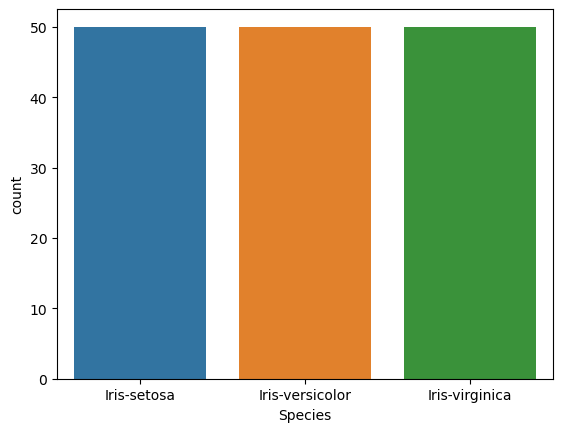

In [14]:
#Checking the class distribution of the data
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Species', data=Iris_df)
plt.show()


## PREPROCESSING

In [15]:
#Removing columns with missing data
cols_with_missing = [col for col in Iris_df.columns
                     if Iris_df[col].isnull().any()]

if cols_with_missing:
    print(cols_with_missing)
else:
    print("No columns with msiing values,therefore no need for imputation")

No columns with msiing values,therefore no need for imputation


In [16]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
my_Encoder = LabelEncoder()
y = my_Encoder.fit_transform(Iris_df['Species'])

## MODEL TRAINING AND EVALUATION

In [17]:
#Create train,validation and  test sets
from sklearn.model_selection import train_test_split
features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X = Iris_df[features]
#first split into train and validation test set
X_train,X_val,y_train,y_val = train_test_split(X,y,stratify= y,test_size = 0.4,random_state =42)
#Sec split of the validation test set into val and final test sets
X_val,X_test,y_val,y_test = train_test_split(X_val,y_val,stratify = y_val,test_size = 0.5,random_state =42)

In [18]:
#Check the distribution of your sets 
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(30, 4)
(90,)
(30,)
(30, 4)
(30,)


#### DECISION CLASSIFIER

In [19]:
DT_classifier = DecisionTreeClassifier(random_state = 42)
DT_classifier.fit(X_train,y_train)

#Predictions on validation set
predictions_val = DT_classifier.predict(X_val)
DT_accuracy_val = accuracy_score(y_val,predictions_val)

# Inverse transforming the encoded labels back to their original names(validation set)
predicted_labels_val = my_Encoder.inverse_transform(predictions_val)
actual_labels_val = my_Encoder.inverse_transform(y_val)

#Predictions on test set
predictions_test = DT_classifier.predict(X_test)
DT_accuracy_test = accuracy_score(y_test,predictions_test)

# Inverse transforming the encoded labels back to their original names(test set)
predicted_labels_test = my_Encoder.inverse_transform(predictions_test)
actual_labels_test = my_Encoder.inverse_transform(y_test)

#Classification report of validation predictions and test predictions
#validation
classification_Report_val = classification_report(actual_labels_val, predicted_labels_val, digits=4)

print(f'Validation Accuracy is:\t{DT_accuracy_val}')
print(f'Validation Classification Report:\n{classification_Report_val}')

#Test
classification_Report_test = classification_report(actual_labels_test, predicted_labels_test, digits=4)

print(f'Test Accuracy is:\t{DT_accuracy_test}')
print(f'Test set Classification Report:\n{classification_Report_test}')


Validation Accuracy is:	0.9666666666666667
Validation Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa     1.0000    1.0000    1.0000        10
Iris-versicolor     1.0000    0.9000    0.9474        10
 Iris-virginica     0.9091    1.0000    0.9524        10

       accuracy                         0.9667        30
      macro avg     0.9697    0.9667    0.9666        30
   weighted avg     0.9697    0.9667    0.9666        30

Test Accuracy is:	0.9333333333333333
Test set Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa     1.0000    1.0000    1.0000        10
Iris-versicolor     0.8333    1.0000    0.9091        10
 Iris-virginica     1.0000    0.8000    0.8889        10

       accuracy                         0.9333        30
      macro avg     0.9444    0.9333    0.9327        30
   weighted avg     0.9444    0.9333    0.9327        30



Confusion Matrix for Validation Predictions and test predictions: 


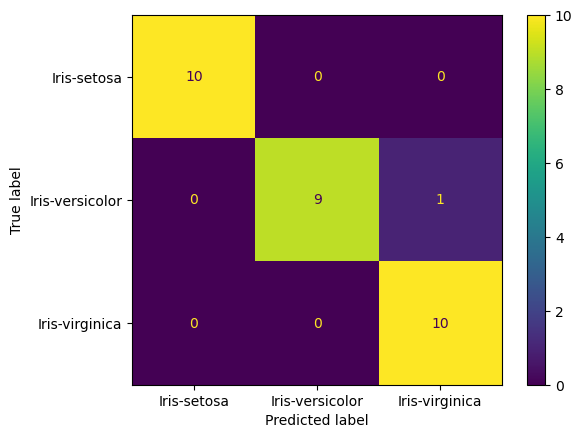

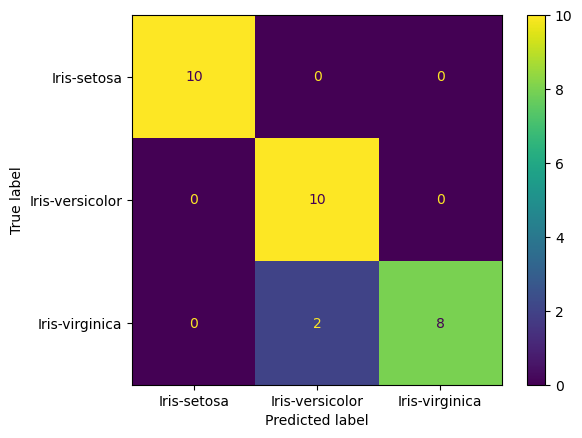

In [20]:
# Compute and display the confusion matrix for validation and test predictions
print("Confusion Matrix for Validation Predictions and test predictions: ")
#Validation Predictions
cm = confusion_matrix(actual_labels_val, predicted_labels_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(actual_labels_val))

disp.plot(cmap='viridis')

#Test predictions
cm = confusion_matrix(actual_labels_test, predicted_labels_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(actual_labels_test))
disp.plot(cmap='viridis')

In [21]:
print(X_val.shape)

(30, 4)


In [22]:
KNN_classifier = KNeighborsClassifier(n_neighbors = 4)
KNN_classifier.fit(X_train,y_train)

#Predictions on validation set
KNN_predictions_val = KNN_classifier.predict(X_val)
KNN_accuracy_val = accuracy_score(y_val,KNN_predictions_val)

# Inverse transforming the encoded labels back to their original names(validation set)
KNN_predicted_labels_val = my_Encoder.inverse_transform(KNN_predictions_val)
KNN_actual_labels_val = my_Encoder.inverse_transform(y_val)

#Predictions on test set
KNN_predictions_test = KNN_classifier.predict(X_test)
KNN_accuracy_test = accuracy_score(y_test,KNN_predictions_test)

# Inverse transforming the encoded labels back to their original names(test set)
KNN_predicted_labels_test = my_Encoder.inverse_transform(KNN_predictions_test)
KNN_actual_labels_test = my_Encoder.inverse_transform(y_test)

#Classification report of validation predictions and test predictions

#validation
KNN_classification_Report_val = classification_report(KNN_actual_labels_val, KNN_predicted_labels_val, digits=4)
print(f'Validation Accuracy is:\t{KNN_accuracy_val:.4f}')
print(f'Validation Classification Report:\n{KNN_classification_Report_val}')

#Test
KNN_classification_Report_test = classification_report(KNN_actual_labels_test, KNN_predicted_labels_test, digits=4)
print(f'Test Accuracy is:\t{KNN_accuracy_test:.4f}')
print(f'Test set Classification Report:\n{KNN_classification_Report_test}')


Validation Accuracy is:	0.9333
Validation Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa     1.0000    1.0000    1.0000        10
Iris-versicolor     0.8333    1.0000    0.9091        10
 Iris-virginica     1.0000    0.8000    0.8889        10

       accuracy                         0.9333        30
      macro avg     0.9444    0.9333    0.9327        30
   weighted avg     0.9444    0.9333    0.9327        30

Test Accuracy is:	0.9000
Test set Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa     1.0000    1.0000    1.0000        10
Iris-versicolor     0.7692    1.0000    0.8696        10
 Iris-virginica     1.0000    0.7000    0.8235        10

       accuracy                         0.9000        30
      macro avg     0.9231    0.9000    0.8977        30
   weighted avg     0.9231    0.9000    0.8977        30



Confusion Matrix for Validation Predictions and test predictions: 


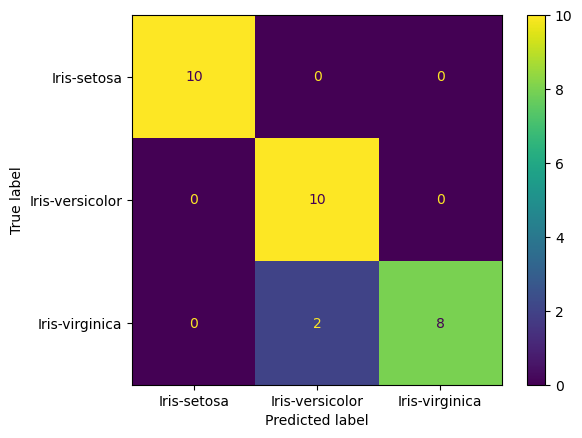

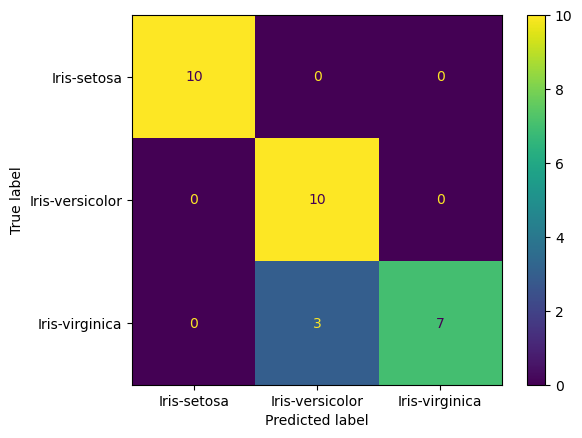

In [23]:
# Compute and display the confusion matrix for validation and test predictions
print("Confusion Matrix for Validation Predictions and test predictions: ")
#Validation Predictions
cm = confusion_matrix(KNN_actual_labels_val, KNN_predicted_labels_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(KNN_actual_labels_val))

disp.plot(cmap='viridis')

#Test predictions
cm = confusion_matrix(KNN_actual_labels_test, KNN_predicted_labels_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(KNN_actual_labels_test))
disp.plot(cmap='viridis')

# Conclusion 